**Predicting Heart Disease Using Machine Learning Algorithms**

**Analyse the heartDisease.csv dataset to explore the machine learning algorithms and build decision tree models to predict the disease.**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [2]:
df=pd.read_csv("HeartDisease (1).csv")

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**EDA(Exploratory Data Analysis)**

In [4]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

**Checking for Null values**

In [5]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

**Checking duplicates values**

In [6]:
df.duplicated().sum()

1

In [7]:
#remove duplicates records
df.drop_duplicates(inplace=True)

**Checking the distribution of Target Variables**
  

In [8]:
#output:target : predict whether patient have heart related problem or not
#1.yes and 0:no
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

  1----->Heart Disease
  
  0----->Normal Heart

**Visualize using countplot**

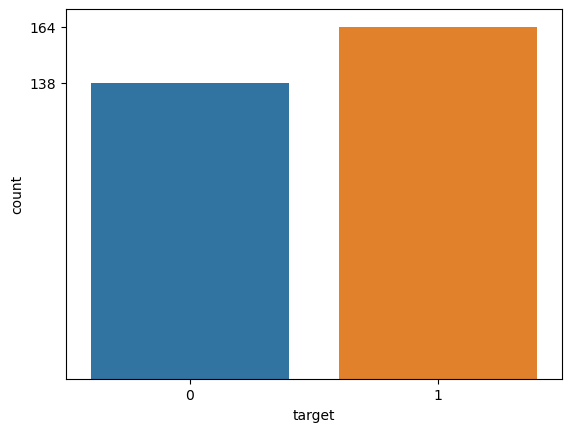

target
1    164
0    138
Name: count, dtype: int64


In [9]:
f=df['target'].value_counts()
sb.countplot(data=df,x='target')
plt.yticks(f)
plt.show()
print(f)

**Separating features and Target**

In [10]:
#separate input and output
x=df.drop('target',axis=1)
y=df['target']

In [11]:
x.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


**Splitting the data into Training and Testing data**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

##0.3 means 30% of data is for testing and the remaining 60% of data is for training##

In [13]:
x_train.shape,y_train.shape

((211, 13), (211,))

**Scaling the data**

In [14]:
#apply standard scaleing
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
x_train.shape

(211, 13)

In [16]:
x_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

**Model Training and Evaluation**

**1.Logistic Regression**

In [17]:
#create user defined function
def create_model(model):
    model.fit(x_train,y_train)  #train the model with 70% data
    y_pred=model.predict(x_test) #test the model with 30% data
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return model

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
#perform the model with the help of logistic regression(type of classification) algorithm
#call class
from sklearn.linear_model import LogisticRegression

In [20]:
#create the object
lr=LogisticRegression()

In [21]:
#create the function
lr=create_model(lr)

[[30  8]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Accuracy score of Logistic Regression : 81% 

In [22]:
#use decision tree classifire
#call class
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc=DecisionTreeClassifier(random_state=1)

In [24]:
#call user defined function
dtc=create_model(dtc)

[[30  8]
 [16 37]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91



Accuracy score of Decision Tree Classifier: 74%

In [25]:
#create a df 
dict={'input columns':x.columns,'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.317338
1,cholestrol,0.113529
2,ca,0.113295
3,thalassemia,0.088533
4,age,0.085167
5,exer_angina,0.081387
6,thalach,0.073287
7,old_peak,0.061444
8,rest_bps,0.045681
9,gender,0.020339


In [26]:
#in decisiontreeclassifier,we got less than score0.70 means 70% reason behind the less score,model is overfit
#so we reduce overfiting the model, then use pruning technique of DecisionTreeClassifier class
#how to reduce overfitting situation by using the pruning technique:
#  1: max_dept: inbuilt parameter of DecisionTreeClassifier class
#  2.min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class

In [27]:
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
'''for i in range (1,9): #start=1 stop=9-1=8 step=+1
    #create object of DecisionTreeClassifier class and passing the parameter max_dept
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMax dept: ",i)
    #call user defined function
    dtc1=create_model(dtc1)'''
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
dtc1=DecisionTreeClassifier(random_state=1,max_depth=3)
#by default use method gini index
#call user defined function
dtc1=create_model(dtc1)

[[26 12]
 [12 41]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



In [28]:
#create a df 
dict={'input columns':x.columns,'IG':dtc1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.513685
1,ca,0.159350
2,exer_angina,0.131743
3,old_peak,0.084076
4,age,0.047148
5,cholestrol,0.041540
6,rest_bps,0.022457
7,gender,0.000000
8,fasting_blood_sugar,0.000000
9,rest_ecg,0.000000


In [29]:
#by using DecisionTreeClassifier 
#In the above report, Recall score=o.77 means 70% and 
#Accuracy=0.74
#By using DecisionTreeClassifier using gini_index(max_depth)

In [30]:
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
'''for i in range (1,9): #start=1 stop=9-1=8 step=+1
    #create object of DecisionTreeClassifier class and passing the parameter max_dept
    dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMax dept: ",i)
    #call user defined function
    dtc1=create_model(dtc1)'''
#max_dept: inbuilt parameter of DecisionTreeClassifier class
#value of max_depth parameter for any dataset<=8
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=6)
#by default use method gini index
#call user defined function
dtc1=create_model(dtc1)

[[28 10]
 [13 40]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91



In [31]:
dict={'input columns':x.columns,'IG':dtc1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.261707
1,ca,0.139269
2,age,0.112116
3,rest_bps,0.101919
4,thalach,0.096232
5,thalassemia,0.084927
6,exer_angina,0.069672
7,cholestrol,0.065036
8,old_peak,0.038586
9,gender,0.030536


In [32]:
#by using DecisionTreeClassifier 
#In the above report, Recall score=o.75 means 75% and 
#Accuracy=0.75
#By using DecisionTreeClassifier using Entropy(max_depth)

In [33]:
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#it is second pruning technique,leaf means no child
#value of min_samples_leaf parameter for any dataset >=45 and <=100
'''for i in range (45,101): #start=45 stop=101-1=100 step=+1
    #create object of DecisionTreeClassifier class and passing the parametr\er min_samples_leaf
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=1)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMin_samples_leaf: ",i)
    #call user defined function
    dtc2=create_model(dtc2)'''
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#value of min_samples_leaf parameter for any dataset >=45 and <=100
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#by default use method gini index
#call user defined function
dtc2=create_model(dtc2)

[[26 12]
 [15 38]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



In [34]:
dict={'input columns':x.columns,'IG':dtc2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.704874
1,ca,0.218659
2,age,0.076467
3,gender,0.000000
4,rest_bps,0.000000
5,cholestrol,0.000000
6,fasting_blood_sugar,0.000000
7,rest_ecg,0.000000
8,thalach,0.000000
9,exer_angina,0.000000


In [35]:
#by using DecisionTreeClassifier 
#In the above report, Recall score=o.72 means 72% and 
#Accuracy=0.70
#By using DecisionTreeClassifier using gini_index(min_samples_leaf)

In [36]:
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#it is second pruning technique,leaf means no child
#value of min_samples_leaf parameter for any dataset >=45 and <=100
'''for i in range (45,101): #start=45 stop=101-1=100 step=+1
    #create object of DecisionTreeClassifier class and passing the parametr\er min_samples_leaf
    dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=1)
    #i=1 then i=2 etc
    #by default use method gini index
    print("\nMin_samples_leaf: ",i)
    #call user defined function
    dtc2=create_model(dtc2)'''
#min_samples_leaf: inbuilt parameter of DecisionTreeClassifier class
#value of min_samples_leaf parameter for any dataset >=45 and <=100
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#by default use method gini index
#call user defined function
dtc2=create_model(dtc2)

[[26 12]
 [15 38]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



In [37]:
dict={'input columns':x.columns,'IG':dtc2.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.623586
1,ca,0.277669
2,age,0.098745
3,gender,0.000000
4,rest_bps,0.000000
5,cholestrol,0.000000
6,fasting_blood_sugar,0.000000
7,rest_ecg,0.000000
8,thalach,0.000000
9,exer_angina,0.000000


In [38]:
#by using DecisionTreeClassifier 
#In the above report, Recall score=o.72 means 72% and 
#Accuracy=0.70
#By using DecisionTreeClassifier using Entropy(min_samples_leaf)

In [39]:
#apply Ensembling Technique
#1.BootStraping method:
#RANDOMfORESTTREE(USE BAGGINBG):
from sklearn.ensemble import RandomForestClassifier

In [40]:
#Randamforest classifier  inbuil inner class
'''for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No. of estimators means no. of Decision tree :',i)
    rfc=create_model(rfc)'''
rfc=RandomForestClassifier(n_estimators=81,random_state=1)
#call function
rfc=create_model(rfc)

[[29  9]
 [12 41]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [41]:
#create a dict
dict={'input columns':x.columns,'IG':rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,input columns,IG
0,chest_pain,0.176114
1,thalach,0.124594
2,ca,0.098859
3,thalassemia,0.098613
4,old_peak,0.094800
5,rest_bps,0.082581
6,cholestrol,0.067916
7,age,0.067744
8,exer_angina,0.066672
9,slope,0.057962


In [42]:
#in the above report recall score=0.77 means 77%
#using the RandomForestCalssifier

# save model

In [43]:
#use file handling of python : use pickle (inbuild library)
import pickle

In [44]:
#save object of algorithm (got best score)
#to open file in write binary
#tempfile+open('permanent file','modes of files')
#write/save in binary mode :  wb
#read in binary mode : rb
import os
os.getcwd()

'C:\\Users\\Anisha Kadam\\Downloads'

In [45]:
# to open file in write binary for model create
file1=open("model.pkl","wb")  #model.pkl: new file which store object of algorithm which got best score

# to open file in write binary for scaling
file2=open("scale.pkl","wb")  #scale.pkl: new file which store object of Standardscaler class
#fil1 and file2 both are temporary file

#file3=open("label.pkl","wb") for label encoder if it is there

In [46]:
# save  object of algorithm  (decisiontreeclassifire) class in temp file file1
#use inbuild method dump() which method define in pickle class
pickle.dump(lr,file1) #syntax: pickle.dump(object of algorithm, temp file)
# to close temp file file1
file1.close()

In [47]:
#save object of standardscalet class
pickle.dump(ss,file2)
#to close temp file2
file2.close()